In [42]:
import pandas as pd

In [43]:
pwd

'C:\\Users\\NITHIN\\Documents\\02)Data Science with Python\\Data-Science-with-Python-Project-2'

In [44]:
#Input movies dataset
movies = pd.read_csv("C:\\Users\\NITHIN\\Documents\\02)Data Science with Python\\Data-Science-with-Python-Project-2\\movies.dat", sep="::", names=['MovieID', 'Title', 'Genres'] )

<ipython-input-44-20f623867f1f>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("C:\\Users\\NITHIN\\Documents\\02)Data Science with Python\\Data-Science-with-Python-Project-2\\movies.dat", sep="::", names=['MovieID', 'Title', 'Genres'] )


In [45]:
#Read the sample movies dataset
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
#Input ratings dataset
ratings = pd.read_csv("C:\\Users\\NITHIN\\Documents\\02)Data Science with Python\\Data-Science-with-Python-Project-2\\ratings.dat", sep="::", names=['UserID', 'MovieID', 'Rating', 'Timestamp'] )

#Read the sample ratings dataset
ratings.head()

<ipython-input-49-7bed20d38662>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("C:\\Users\\NITHIN\\Documents\\02)Data Science with Python\\Data-Science-with-Python-Project-2\\ratings.dat", sep="::", names=['UserID', 'MovieID', 'Rating', 'Timestamp'] )


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [50]:
#Input users dataset
users = pd.read_csv("C:\\Users\\NITHIN\\Documents\\02)Data Science with Python\\Data-Science-with-Python-Project-2\\users.dat", sep="::", names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'] )

<ipython-input-50-bedd54aca3ee>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv("C:\\Users\\NITHIN\\Documents\\02)Data Science with Python\\Data-Science-with-Python-Project-2\\users.dat", sep="::", names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'] )


In [51]:
#Read the sample users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [52]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


<function matplotlib.pyplot.show(*args, **kw)>

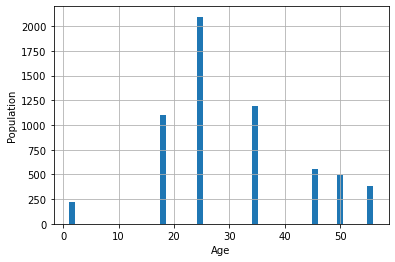

In [53]:
#User age distribution
import matplotlib.pyplot as plt

users['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: MovieID, dtype: int64

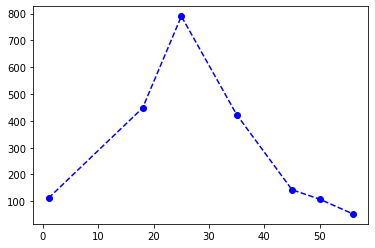

In [54]:
#User rating of the movie “Toy Story”

res = master_data[master_data.Title == "Toy Story (1995)"]

plt.plot(res.groupby("Age")["MovieID"].count(),'--bo')
res.groupby("Age")["MovieID"].count()

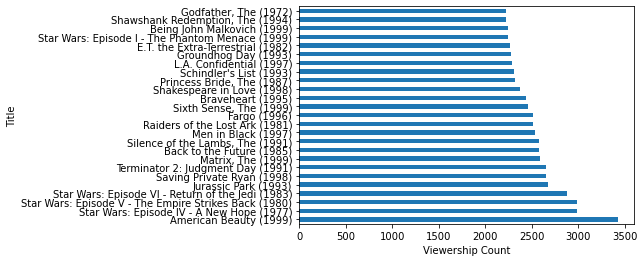

In [55]:
#Top 25 movies by viewership rating

res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh")
#res

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
440667,1258,"Shining, The (1980)",2696,25,M,7,4
440668,1270,Back to the Future (1985),2696,25,M,7,2
440669,1617,L.A. Confidential (1997),2696,25,M,7,4
440670,1625,"Game, The (1997)",2696,25,M,7,4
440671,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2
440672,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4
440673,1805,Wild Things (1998),2696,25,M,7,4
440674,1892,"Perfect Murder, A (1998)",2696,25,M,7,4
440675,800,Lone Star (1996),2696,25,M,7,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,25,M,7,2


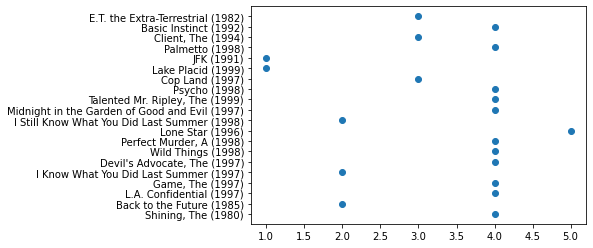

In [56]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

res = master_data[master_data.UserID == 2696]

plt.scatter(y=res.Title, x=res.Rating)

res

In [57]:
#Feature Engineering

val = movies.Genres.str.split("|")

res_col = []
for v in val:
    for i in v:
        if i not in res_col:
            res_col.append(i)

res_col.append("Gender")
res_col.append("Age")
res_col.append("Rating")

df = pd.DataFrame(columns=res_col)

res = master_data.merge(movies, on = ['MovieID'], how="left")[["Genres","Rating","Gender", "Age"]]

for index, row in res.head(20000).iterrows():
    tmp = row.Genres.split("|") 
    
    for i in tmp:
       # print(i)
        df.loc[index,i] = 1
        df.loc[index,"Gender"] = res.loc[index,"Gender"]
        df.loc[index,"Age"] = res.loc[index,"Age"]
        df.loc[index,"Rating"] = res.loc[index,"Rating"]
         
#         var = res.loc[index, "Rating"]
#         if var == 1:
#             df.loc[index,"Rating"] = "one" 
#         elif var == 2:
#             df.loc[index,"Rating"] = "two"
#         elif var == 3:
#             df.loc[index,"Rating"] = "three"
#         elif var == 4:
#             df.loc[index,"Rating"] = "four"
#         else:
#             df.loc[index,"Rating"] = "five"
     
    df.loc[index,df.columns[~df.columns.isin(tmp+["Gender","Rating","Age"])]] = 0

df.head()
    

#df.loc[i,"Animation"] = 1

#df

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Gender,Age,Rating
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,5
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,4
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,1,5


In [58]:

from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

X = df[df.columns[~df.columns.isin(["Rating"])]]
y = df.Rating

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

number = LabelEncoder()
X_train.Gender = number.fit_transform(X_train["Gender"].astype("str"))
X_test.Gender = number.fit_transform(X_test["Gender"].astype("str"))
y_train = number.fit_transform(y_train.astype("int"))
y_test = number.fit_transform(y_test.astype("int"))

C:\Users\NITHIN\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
#SVM

from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
accuracy
#cm

0.34

In [60]:
#KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

accuracy

0.3102

In [61]:
#Naive Bayes classifier 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test)  
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

accuracy

0.2788